## Importing Libs

In [48]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## DataBase Connection

In [2]:
connection = sqlite3.connect('travel.sqlite')
cursor = connection.cursor()


In [3]:
cursor.execute(""" select name from sqlite_master where type = 'table';""")
print("List of the tables in the database")
table_list = [table[0] for table in cursor.fetchall()]
table_list

List of the tables in the database


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

## Data Exploration

In [4]:
aircrafts_data = pd.read_sql_query("select * from aircrafts_data", connection)
aircrafts_data.head()

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600


In [5]:
aircrafts_data.shape

(9, 3)

In [6]:
airports_data = pd.read_sql_query("select * from airports_data", connection)
airports_data.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [7]:
airports_data.shape

(104, 5)

In [8]:
boarding_passes = pd.read_sql_query("select * from boarding_passes", connection)
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [9]:
bookings = pd.read_sql_query("select * from bookings", connection)
bookings.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [10]:
flights = pd.read_sql_query("select * from flights", connection)
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [11]:
seats = pd.read_sql_query("select * from seats", connection)
seats.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [12]:
ticket_flights = pd.read_sql_query("select * from ticket_flights", connection)
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [13]:
tickets = pd.read_sql_query("select * from tickets", connection)
tickets.head()

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


In [14]:
for table in table_list:
    print("\ntable: ",table)
    column_info = connection.execute("PRAGMA table_info({})".format(table))
    for column in column_info.fetchall():
        print(column[1:3])
        


table:  aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

table:  airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

table:  boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

table:  bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

table:  flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

table:  seats
('aircraft_code', 'character(3)')
('seat_no', 'character var

In [15]:
for table in table_list:
    print("\ntable: ",table)
    df_table = pd.read_sql_query(f"select * from {table}",connection)
    print(df_table.isnull().sum())


table:  aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

table:  airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

table:  boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

table:  bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

table:  flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

table:  seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

table:  ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

table:  tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


## Analysis

#### How many planes have more than 100 seats ?

In [16]:
pd.read_sql_query("""select aircraft_code,count(*) as num_seats from seats 
                    group by aircraft_code
                    having num_seats > 100""",connection)

,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


#### Number of tickets booked and total amount earned as per the change with time

In [18]:
tics = pd.read_sql_query("""select * from bookings inner join tickets on
                            bookings.book_ref = tickets.book_ref""",connection)

In [19]:
tics

,book_ref,book_date,total_amount,ticket_no,book_ref,passenger_id
0,00000F,2017-07-05 03:12:00+03,265700,0005435838975,00000F,1708 262537
1,000012,2017-07-14 09:02:00+03,37900,0005432527326,000012,9091 269355
2,000068,2017-08-15 14:27:00+03,18100,0005432293273,000068,5895 674437
3,000181,2017-08-10 13:28:00+03,131800,0005435545944,000181,6799 285573
4,000181,2017-08-10 13:28:00+03,131800,0005435545945,000181,0929 739492
...,...,...,...,...,...,...
366728,FFFF43,2017-07-20 20:42:00+03,78500,0005433986163,FFFF43,0169 339108
366729,FFFF43,2017-07-20 20:42:00+03,78500,0005433986164,FFFF43,0961 118506
366730,FFFFA8,2017-08-08 04:45:00+03,28800,0005435426293,FFFFA8,0563 487643
366731,FFFFF7,2017-07-01 22:12:00+03,73600,0005434343796,FFFFF7,3211 278709


In [20]:
tics.dtypes

book_ref        object
book_date       object
total_amount     int64
ticket_no       object
book_ref        object
passenger_id    object
dtype: object

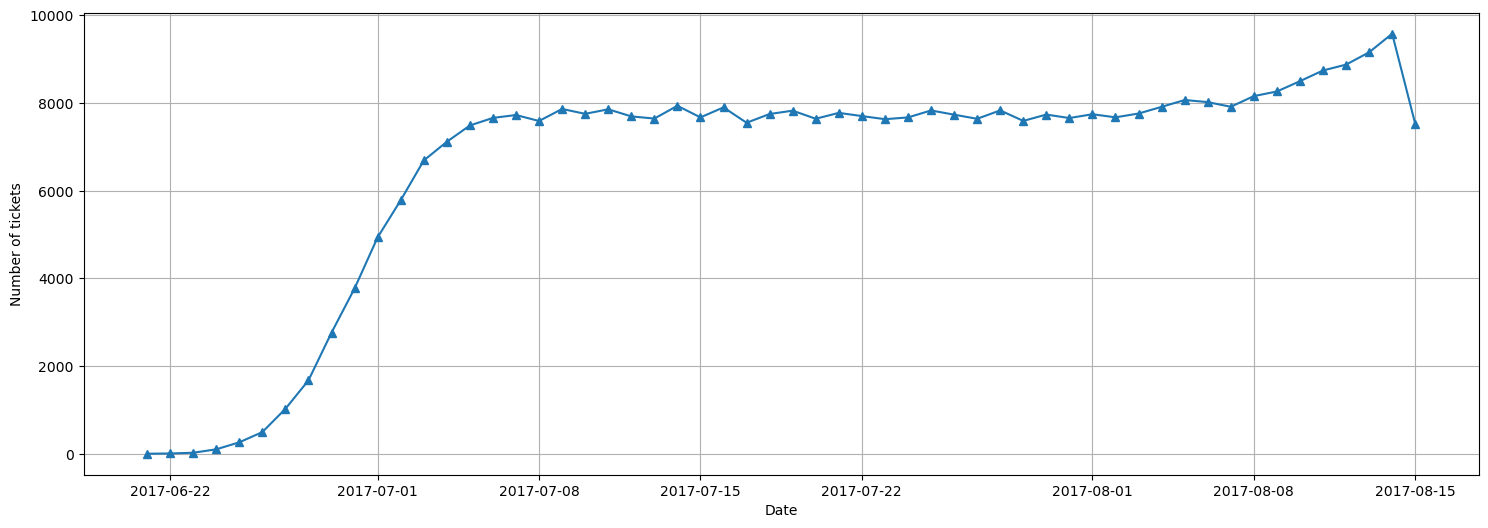

In [28]:
tics['book_date'] = pd.to_datetime(tics['book_date'])
tics['date'] = tics['book_date'].dt.date

x = tics.groupby('date')[['date']].count()
plt.figure(figsize = (18,6))
plt.plot(x.index,x['date'],marker = '^')
plt.xlabel('Date')
plt.ylabel('Number of tickets')
plt.grid('b')
plt.show()

In [35]:
bookings = pd.read_sql_query("""select sum(total_amount) as Total_Amt from bookings""", connection)
bookings['book_date'] = pd.to_datetime(bookings['book_date'])
bookings['date'] = bookings['book_date'].dt.date
bookings

,book_ref,book_date,total_amount,date
0,00000F,2017-07-05 03:12:00+03:00,265700,2017-07-05
1,000012,2017-07-14 09:02:00+03:00,37900,2017-07-14
2,000068,2017-08-15 14:27:00+03:00,18100,2017-08-15
3,000181,2017-08-10 13:28:00+03:00,131800,2017-08-10
4,0002D8,2017-08-07 21:40:00+03:00,23600,2017-08-07
...,...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03:00,56000,2017-07-17
262784,FFFF2C,2017-08-08 05:55:00+03:00,10800,2017-08-08
262785,FFFF43,2017-07-20 20:42:00+03:00,78500,2017-07-20
262786,FFFFA8,2017-08-08 04:45:00+03:00,28800,2017-08-08


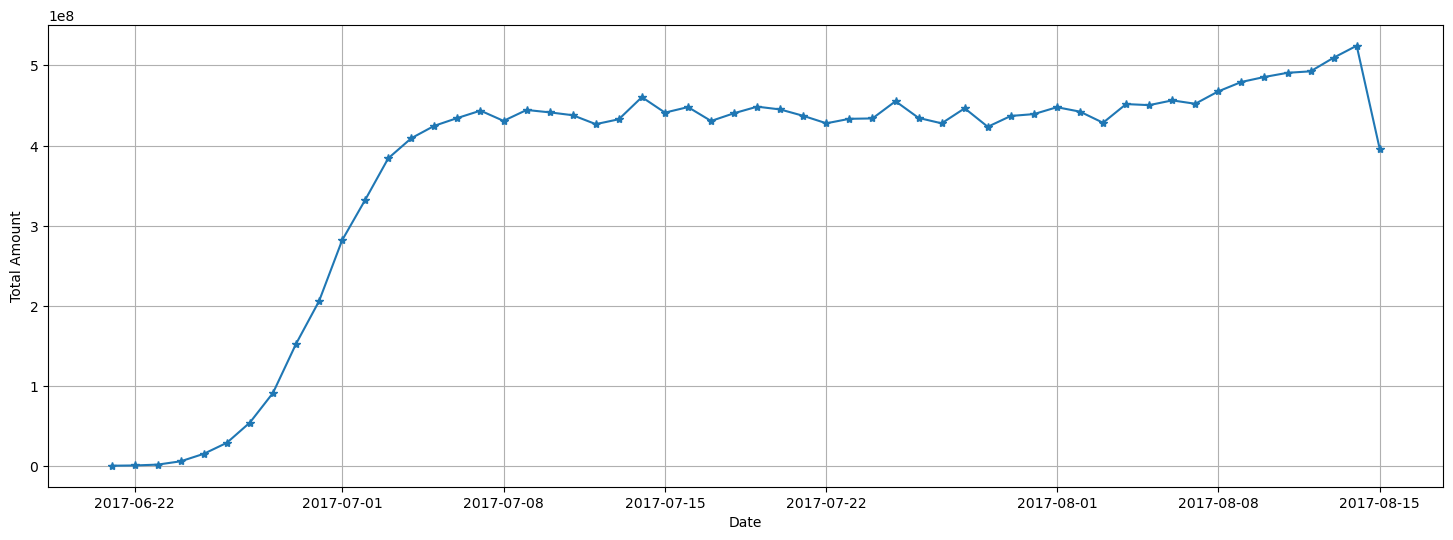

In [39]:
x =bookings.groupby('date')[['total_amount']].sum()
plt.figure(figsize = (18,6))
plt.plot(x.index,x['total_amount'],marker = '*')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid('b')
plt.show()

#### Average Charge for each aircraft with different fare conditions

In [52]:
df = pd.read_sql_query("""select fare_conditions,aircraft_code,avg(amount) as Avg_Amount from ticket_flights join flights 
                        on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code,fare_conditions """,connection)

In [53]:
df

,fare_conditions,aircraft_code,Avg_Amount
0,Business,319,113550.557703
1,Economy,319,38311.402347
2,Business,321,34435.662664
3,Economy,321,11534.974764
4,Business,733,41865.626175
5,Economy,733,13985.152000
6,Business,763,82839.842866
7,Economy,763,27594.721829
8,Business,773,57779.909435
9,Comfort,773,32740.552889


<AxesSubplot:xlabel='aircraft_code', ylabel='Avg_Amount'>

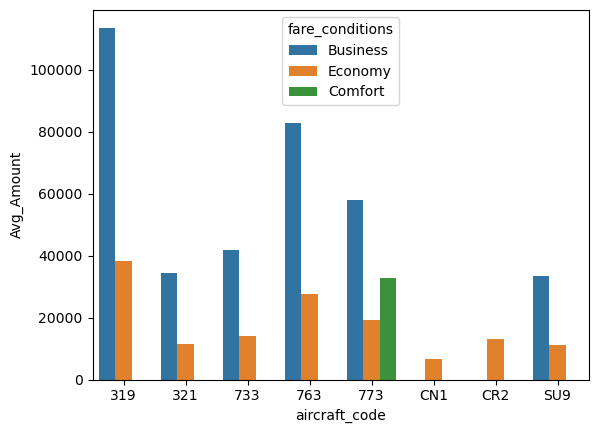

In [55]:
sns.barplot(data = df, x ='aircraft_code', y='Avg_Amount',hue='fare_conditions')

## Analyzing Occupancy Rate 

####  For each aircraft calculating the total Revenue per year and average revenue per ticket

In [59]:
pd.read_sql_query("""select aircraft_code, TicketCount,TotalAmount,TotalAmount/TicketCount as AvgRevenuePerTicket from
                    (select aircraft_code, count(*) as TicketCount, sum(amount) as TotalAmount from ticket_flights
                    join flights on ticket_flights.flight_id = flights.flight_id
                    group by aircraft_code)""", connection)

,aircraft_code,TicketCount,TotalAmount,AvgRevenuePerTicket
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


In [69]:
Occupancy_rate = pd.read_sql_query("""select a.aircraft_code,avg(a.seat_count) as BookedSeats, b.NumOfSeats, avg(a.seat_count)/b.NumOfSeats as OccupancyRate
from                        (select aircraft_code,flights.flight_id,count(*) as seat_count from boarding_passes 
                        inner join flights on boarding_passes.flight_id = flights.flight_id
                        group by aircraft_code, flights.flight_id) as a inner join
                        (select aircraft_code, count(*) as NumOfSeats from seats group by aircraft_code) as b 
                        on a.aircraft_code = b.aircraft_code group by a.aircraft_code""", connection)

#### Increase in Occupancy rate by 10%

In [70]:
Occupancy_rate['Inc Occupancy Rate'] = Occupancy_rate['OccupancyRate'] + Occupancy_rate['OccupancyRate']*0.1

In [71]:
Occupancy_rate

,aircraft_code,BookedSeats,NumOfSeats,OccupancyRate,Inc Occupancy Rate
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [79]:
total_revenue = pd.read_sql_query("""select aircraft_code,sum(amount) as total_revenue from ticket_flights
                                    join flights on ticket_flights.flight_id = flights.flight_id
                                    group by aircraft_code""", connection)

Occupancy_rate['Increase in AnnualTurnover'] = (total_revenue['total_revenue']/Occupancy_rate['OccupancyRate'])*Occupancy_rate['Inc Occupancy Rate']

In [80]:
Occupancy_rate

,aircraft_code,BookedSeats,NumOfSeats,OccupancyRate,Inc Occupancy Rate,Increase in AnnualTurnover
0,319,53.583181,116,0.461924,0.508116,2.976779e+09
1,321,88.809231,170,0.522407,0.574648,1.801981e+09
2,733,80.255462,130,0.617350,0.679085,1.569207e+09
3,763,113.937294,222,0.513231,0.564554,4.808405e+09
4,773,264.925806,402,0.659019,0.724921,3.774326e+09
5,CN1,6.004431,12,0.500369,0.550406,1.060112e+08
6,CR2,21.482847,50,0.429657,0.472623,2.181037e+09
7,SU9,56.812113,97,0.585692,0.644261,5.625933e+09
